# Tensor Flow
A simple introduction to tensor flow + neural networks

I will use this library to get the **linear** regression in single layer neural network

**Reference**: [link](https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C2%20-%20Advanced%20Learning%20Algorithms/week1/optional-labs/C2_W1_Lab01_Neurons_and_Layers.ipynb)

# Data

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [106]:
def generate_data_with_noise(func):
  x = np.arange(1, 101, 1)
  y = func(x) + np.random.normal(0, 10, len(x))

  return x, y

In [107]:
ACTUAL_W = 3
ACTUAL_B = 2

func = lambda x : ACTUAL_W * x + ACTUAL_B
x, y = generate_data_with_noise(func)

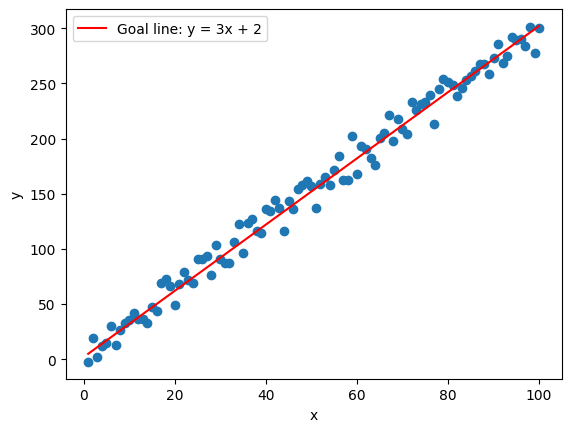

In [108]:
plt.scatter(x, y)
plt.plot(x, func(x), color='red', label=f'Goal line: y = {ACTUAL_W}x + {ACTUAL_B}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.show()

# Prepare Data

Tensor flow returning nan for y_pred. Let's normalize data so tensor flow can predict

In [109]:
x = x.reshape(-1, 1)

In [110]:
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

# Tensor Flow
Let's get this tensor flow to predict this about the data!

## Train Model

One neuron layer, that performs linear regression with gradient regression

In [111]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1], activation='linear')
])

model.compile(optimizer='sgd', loss='mean_squared_error')

/Users/912608/workspace/personal/machine learning/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
x = x.reshape(-1, 1)

In [113]:
model.fit(x, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8468 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0227 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6383 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2566 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8536 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6260 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3194 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0800 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9565 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8450 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7104 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6437 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5061 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4596 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3865 
Epoch 16/100
4/4 ━━

In [114]:
y_pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [115]:
w, b = model.layers[0].get_weights()

print(f'normalized w = {w[0][0]}')
print(f'normalized b = {b[0]}')

normalized w = 0.9936047196388245
normalized b = 0.0013872082345187664


## Evaluate Model

In [116]:
w_denorm = w * (y_std / x_std)
b_denorm = b * y_std + y_mean - (w_denorm[0][0] * x_mean)


print(f'denormalized w = {w_denorm[0][0]:.4f} \t goal w = {ACTUAL_W}')
print(f'denormalized b = {b_denorm[0]:.4f} \t goal b = {ACTUAL_B}')

denormalized w = 2.9702 	 goal w = 3
denormalized b = 5.1488 	 goal b = 2


In [117]:
loss = model.evaluate(x, y, verbose=0)
print(f'Total Cost (Loss): {loss:.4e}')

Total Cost (Loss): 1.3053e-02


The loss of 0.01 loss is pretty freaking amazing 🤩

### Visualization

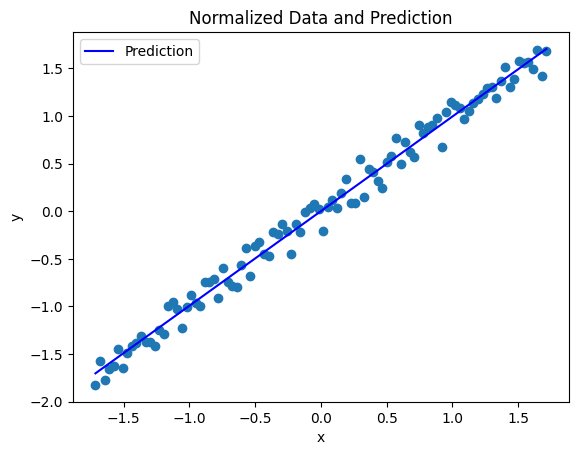

In [118]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', label='Prediction')
plt.title('Normalized Data and Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Now, let's denormalized data

In [119]:
y_pred_denorm = (y_pred * y_std) + y_mean
y_denorm = (y * y_std) + y_mean
x_denorm = (x * x_std) + x_mean

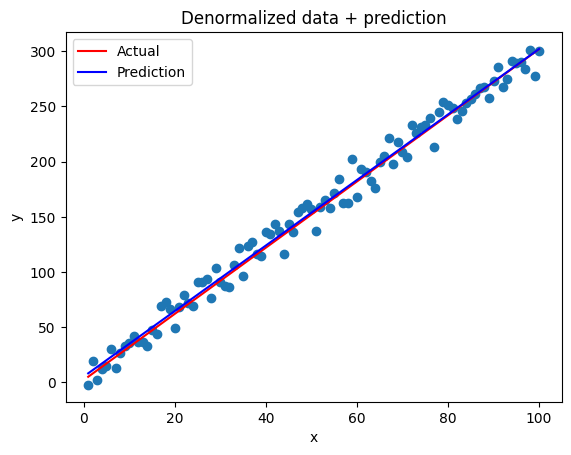

In [122]:
plt.scatter(x_denorm, y_denorm)
plt.plot(x_denorm, func(x_denorm), color='red', label='Actual')
plt.plot(x_denorm, y_pred_denorm, color='blue', label='Prediction')
plt.title('Denormalized data + prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Blue (predicted) and red (actual) are SO CLOSE. What great success 🥳